In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
data = pd.read_csv("merged_hinglish_comments.csv")
data.head()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Combined_Sentiment,Source_File
0,ADANIENT,"At the end of the year, I got a 46% return thi...",2023-12-30,Doubled my money in adani stocks from Jan 2023...,bullish,ADANIENT_hinglish_comments_only_20251008_16013...
1,ADANIENT,"I am scared, What should I do?",2025-02-18,"If you knew what you were doing, then you shou...",bullish,ADANIENT_hinglish_comments_only_20251008_16013...
2,ADANIENT,My plan for 2 lakh investment,2025-03-21,I'd add Tatamotors and Adaniports given that t...,bullish,ADANIENT_hinglish_comments_only_20251008_16013...
3,ADANIENT,Buy now or wait ? Tell me experts,2025-09-26,"Bro, Adani Share Based on News not that Much o...",bullish,ADANIENT_hinglish_comments_only_20251008_16013...
4,ADANIENT,Rate this portfolio,2024-11-07,"Massive! Adani green, when did you buy at 11? ...",bearish,ADANIENT_hinglish_comments_only_20251008_16013...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ticker_Symbol       583 non-null    object
 1   Post_Title          583 non-null    object
 2   Post_Date           583 non-null    object
 3   Comment_Text        583 non-null    object
 4   Combined_Sentiment  583 non-null    object
 5   Source_File         583 non-null    object
dtypes: object(6)
memory usage: 27.5+ KB


In [4]:
data.describe()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Combined_Sentiment,Source_File
count,583,583,583,583,583,583
unique,8,190,171,523,3,27
top,ADANIENT,[YEARLY POST] List down the mutual funds in wh...,2024-08-10,"Market 0 => TCS, INFY kal se band ho jayegi. R...",bullish,ADANIENT_hinglish_comments_only_20251018_19590...
freq,196,34,52,5,317,80


In [5]:
data.columns

Index(['Ticker_Symbol', 'Post_Title', 'Post_Date', 'Comment_Text',
       'Combined_Sentiment', 'Source_File'],
      dtype='object')

In [6]:
data.drop(columns=["Source_File"],inplace=True)

In [7]:
data.head()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Combined_Sentiment
0,ADANIENT,"At the end of the year, I got a 46% return thi...",2023-12-30,Doubled my money in adani stocks from Jan 2023...,bullish
1,ADANIENT,"I am scared, What should I do?",2025-02-18,"If you knew what you were doing, then you shou...",bullish
2,ADANIENT,My plan for 2 lakh investment,2025-03-21,I'd add Tatamotors and Adaniports given that t...,bullish
3,ADANIENT,Buy now or wait ? Tell me experts,2025-09-26,"Bro, Adani Share Based on News not that Much o...",bullish
4,ADANIENT,Rate this portfolio,2024-11-07,"Massive! Adani green, when did you buy at 11? ...",bearish


In [8]:
data.rename(columns={"Combined_Sentiment":"Sentiment"},inplace=True)

In [9]:
data.head()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Sentiment
0,ADANIENT,"At the end of the year, I got a 46% return thi...",2023-12-30,Doubled my money in adani stocks from Jan 2023...,bullish
1,ADANIENT,"I am scared, What should I do?",2025-02-18,"If you knew what you were doing, then you shou...",bullish
2,ADANIENT,My plan for 2 lakh investment,2025-03-21,I'd add Tatamotors and Adaniports given that t...,bullish
3,ADANIENT,Buy now or wait ? Tell me experts,2025-09-26,"Bro, Adani Share Based on News not that Much o...",bullish
4,ADANIENT,Rate this portfolio,2024-11-07,"Massive! Adani green, when did you buy at 11? ...",bearish


Date Analysis:
Earliest date: 2020-05-19 00:00:00
Latest date: 2025-10-14 00:00:00
Total days covered: 1974 days
Total period: 64.8 months

Data distribution by Year-Month:
Year_Month
2020-05     2
2020-11    10
2020-12    12
2021-01     2
2021-02     3
2021-03     6
2021-04    14
2021-05    20
2021-06    11
2021-07     7
2021-08     6
2021-09    38
2021-10     1
2021-11     3
2022-01     1
2022-03    12
2023-01    36
2023-02     7
2023-03     2
2023-07     1
2023-08     1
2023-09     5
2023-10    12
2023-12     3
2024-01    18
2024-02     3
2024-03     4
2024-04     8
2024-05     5
2024-06     2
2024-07    16
2024-08    55
2024-09     8
2024-10    36
2024-11    33
2024-12     4
2025-01    38
2025-02    21
2025-03    25
2025-04    14
2025-05    14
2025-06    26
2025-07     9
2025-08     9
2025-09    16
2025-10     4
Freq: M, Name: count, dtype: int64


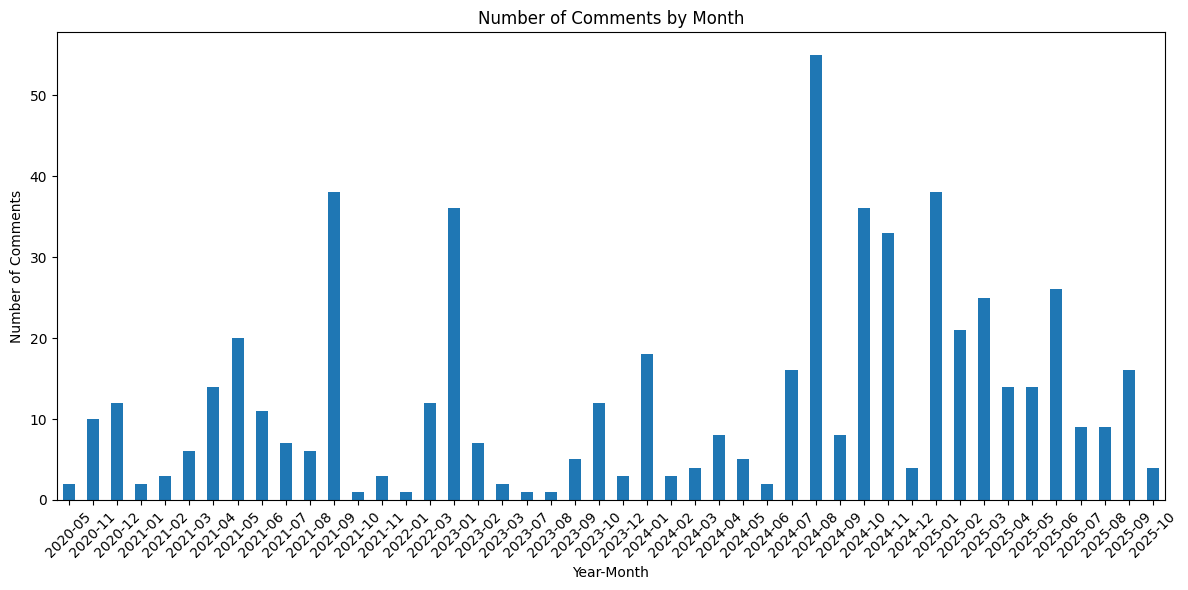


Number of unique dates: 171
Total comments: 583


In [10]:

print("Date Analysis:")

data['Post_Date'] = pd.to_datetime(data['Post_Date'])

print(f"Earliest date: {data['Post_Date'].min()}")
print(f"Latest date: {data['Post_Date'].max()}")
print(f"Total days covered: {(data['Post_Date'].max() - data['Post_Date'].min()).days} days")
print(f"Total period: {(data['Post_Date'].max() - data['Post_Date'].min()).days / 30.44:.1f} months")

print("\nData distribution by Year-Month:")
data['Year_Month'] = data['Post_Date'].dt.to_period('M')
date_counts = data['Year_Month'].value_counts().sort_index()
print(date_counts)

plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar')
plt.title('Number of Comments by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nNumber of unique dates: {data['Post_Date'].nunique()}")
print(f"Total comments: {len(data)}")

In [11]:
from collections import Counter
print(Counter(data["Sentiment"]))
print(Counter(data["Ticker_Symbol"]))

Counter({'bullish': 317, 'neutral': 140, 'bearish': 126})
Counter({'ADANIENT': 196, 'RELIANCE': 123, 'HDFCBANK': 75, 'SBIN': 52, 'ICICIBANK': 51, 'INFY': 31, 'TCS': 30, 'BHARTIARTL': 25})


<Axes: xlabel='Sentiment', ylabel='count'>

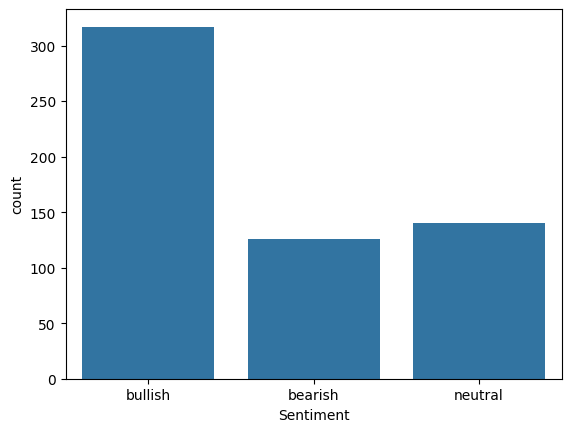

In [12]:
sns.countplot(x=data["Sentiment"])

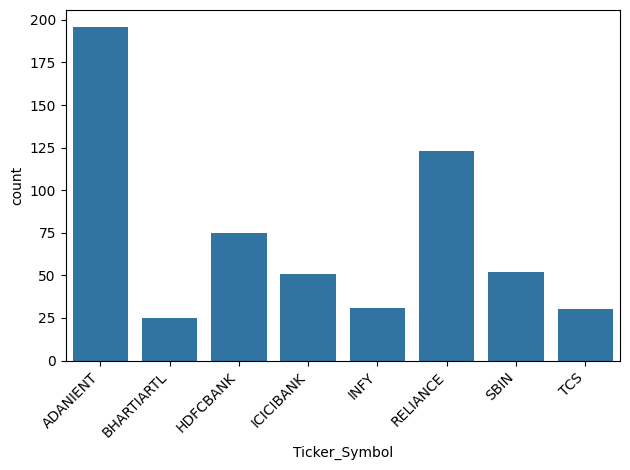

In [13]:
sns.countplot(x=data["Ticker_Symbol"])
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

Data Preprocessing:
1.Label Encoding For Sentiments - Bullish, Bearish And Neutral(ON SENTIMENT COLUMN) by Label Encoder Class
2.Remove Punctuations(ON POST_TITLE AND COMMENT_TEXT COLUMN) and irrelevant things and only keep currency symbols, text, numbers and alphabets
3.Remove URLS from the texts if any using beautiful soup get_text method
4.Bring each word in Lowercase 
5.One Hot Encoding For the Ticker Symbol Column
6.Demojize the text, Emoji will be converted to particular text representing the emoji like this emoji 😍 - will be converted to smiling_face_with_heart-eyes and then remove _ and -.
7.Replace currency symbol with name and expand the contractions
8.Short word for k or m to 1000 or 10,00,000
9.Remove stop words hinglish based too
10.Stemming and lemmatization for the hinglish 
11.Tokenization using simple regex not the nltk.tokenize


In [18]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from bs4 import BeautifulSoup
from emoji import demojize
import nltk
import contractions

In [15]:
nltk.download('punkt')
nltk.download('punkt-tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading punkt-tab: Package 'punkt-tab' not found in
[nltk_data]     index


False

In [19]:
def label_encode_sentiment(sentiment_series):
    le = LabelEncoder()
    return le.fit_transform(sentiment_series)


In [20]:
import string
import re

def remove_punctuations(text):
    pattern = f"[{re.escape(string.punctuation)}]"
    return re.sub(pattern, '', text)

In [21]:
import re

def keep_char_currency_numbers(text, currency_symbols=None):

    if currency_symbols is None:
        currency_symbols = ['$', '₹', '€', '£']

    allowed_symbols = ''.join(re.escape(sym) for sym in currency_symbols)
    
   
    cleaned_text = re.sub(f'[^a-zA-Z0-9 {allowed_symbols}]', '', text)
    
  
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text


In [22]:
def remove_urls(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www.\S+', '', text)
    return text

In [23]:
def lower_case(text):
    return text.lower()

In [24]:
def demojize_text(text):
    text = demojize(text)  
    text = re.sub(r'[:_\-]', ' ', text)  # remove _ and - and : replace with space
    text = re.sub(r'\s+', ' ', text).strip()  # Keep spaces between the text
    return text

In [25]:
def replace_currency(text):
    currency_map = {'$':'dollar', '₹':'rupee', '€':'euro', '£':'pound'}
    for sym, name in currency_map.items():
        text = text.replace(sym, f' {name} ')
    return text


In [26]:
def expand_contractions(text):
    return contractions.fix(text)

In [27]:
import re

def convert_k_m(text):
    text = str(text)
    pattern = r'(\d+\.?\d*)\s*([kKmM])'
    
    def replacer(match):
        number = float(match.group(1))
        suffix = match.group(2).lower()
        if suffix == 'k':
            return str(int(number * 1_000))
        elif suffix == 'm':
            return str(int(number * 1_000_000))
        return match.group(0)

    return re.sub(pattern, replacer, text)


In [28]:
text_columns = ['Post_Title', 'Comment_Text']
for col in text_columns:
    data[col] = data[col].apply(remove_urls)     # remove URLs
    data[col] = data[col].apply(keep_char_currency_numbers)  
    data[col] = data[col].apply(lower_case)                # lowercase
    data[col] = data[col].apply(demojize_text)            # demojize
    data[col] = data[col].apply(replace_currency)         # currency replacement
    data[col] = data[col].apply(expand_contractions)      # expand contractions
    data[col] = data[col].apply(convert_k_m)              # expand k/m
    data[col] = data[col].apply(remove_punctuations)      # remove punctuations



C:\Users\vedan\AppData\Local\Temp\ipykernel_448\3589516182.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [29]:
data.head()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Sentiment,Year_Month
0,ADANIENT,at the end of the year i got a 46 return this ...,2023-12-30,doubled my money in adani stocks from jan 2023...,bullish,2023-12
1,ADANIENT,i am scared what should i do,2025-02-18,if you knew what you were doing then you shoul...,bullish,2025-02
2,ADANIENT,my plan for 2 lakh investment,2025-03-21,id add tatamotors and adaniports given that th...,bullish,2025-03
3,ADANIENT,buy now or wait tell me experts,2025-09-26,bro adani share based on news not that much on...,bullish,2025-09
4,ADANIENT,rate this portfolio,2024-11-07,massive adani green when did you buy at 11 als...,bearish,2024-11


In [30]:
data['Sentiment'] = label_encode_sentiment(data['Sentiment'])

In [31]:
import pandas as pd
ticker_dummies = pd.get_dummies(data['Ticker_Symbol'], prefix='Ticker')
ticker_dummies = ticker_dummies.astype(int)
data = pd.concat([data, ticker_dummies], axis=1)


In [32]:
data.head()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Sentiment,Year_Month,Ticker_ADANIENT,Ticker_BHARTIARTL,Ticker_HDFCBANK,Ticker_ICICIBANK,Ticker_INFY,Ticker_RELIANCE,Ticker_SBIN,Ticker_TCS
0,ADANIENT,at the end of the year i got a 46 return this ...,2023-12-30,doubled my money in adani stocks from jan 2023...,1,2023-12,1,0,0,0,0,0,0,0
1,ADANIENT,i am scared what should i do,2025-02-18,if you knew what you were doing then you shoul...,1,2025-02,1,0,0,0,0,0,0,0
2,ADANIENT,my plan for 2 lakh investment,2025-03-21,id add tatamotors and adaniports given that th...,1,2025-03,1,0,0,0,0,0,0,0
3,ADANIENT,buy now or wait tell me experts,2025-09-26,bro adani share based on news not that much on...,1,2025-09,1,0,0,0,0,0,0,0
4,ADANIENT,rate this portfolio,2024-11-07,massive adani green when did you buy at 11 als...,0,2024-11,1,0,0,0,0,0,0,0


In [33]:
data.drop(columns=["Year_Month","Ticker_Symbol"])

,Post_Title,Post_Date,Comment_Text,Sentiment,Ticker_ADANIENT,Ticker_BHARTIARTL,Ticker_HDFCBANK,Ticker_ICICIBANK,Ticker_INFY,Ticker_RELIANCE,Ticker_SBIN,Ticker_TCS
0,at the end of the year i got a 46 return this ...,2023-12-30,doubled my money in adani stocks from jan 2023...,1,1,0,0,0,0,0,0,0
1,i am scared what should i do,2025-02-18,if you knew what you were doing then you shoul...,1,1,0,0,0,0,0,0,0
2,my plan for 2 lakh investment,2025-03-21,id add tatamotors and adaniports given that th...,1,1,0,0,0,0,0,0,0
3,buy now or wait tell me experts,2025-09-26,bro adani share based on news not that much on...,1,1,0,0,0,0,0,0,0
4,rate this portfolio,2024-11-07,massive adani green when did you buy at 11 als...,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,how to shoot yourself in the foot royally,2024-10-08,show because notice that is a western import w...,1,0,0,0,0,0,0,0,1
579,smartest trader of india,2025-03-01,market 0 tcs infy kal se band ho jayegi relian...,2,0,0,0,0,0,0,0,1
580,thoughts on analysis,2024-07-25,we pay more than 70 of our earnings in taxes e...,2,0,0,0,0,0,0,0,1
581,indians hold 71 of h1b visas trumps rs 90 lakh...,2025-09-20,push global talent elsewhere lol most of these...,1,0,0,0,0,0,0,0,1


In [34]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

eng_stopwords = set(stopwords.words('english'))


hinglish_stopwords = {
    'hai', 'h', 'ha', 'ho', 'hu', 'tha', 'thi', 'the', 'thii', 'raha', 'rahe', 'rha', 'rhe',
    'kar', 'karo', 'karta', 'kartaa', 'karti', 'karte', 'kare', 'kr', 'kre', 'kra', 'krte', 'krta',
    'ka', 'ke', 'ki', 'k', 'ko', 'me', 'mai', 'main', 'mujhe', 'mujhko', 'mera', 'meri', 'mere',
    'tera', 'teri', 'tere', 'tum', 'tu', 'aap', 'apna', 'apni', 'apne', 'hum', 'ham', 'hume', 'hamare',
    'ye', 'yeh', 'wo', 'woh', 'yehi', 'wahi', 'yaha', 'wahaan', 'idhar', 'udhar', 'ab', 'tab', 'jab', 'kab',
    'nahi', 'nhi', 'nahiin', 'na', 'toh', 'to', 'hi', 'bhi', 'vi', 'se', 'ke', 'par', 'pe', 'kaun', 'koi',
    'sab', 'sabhi', 'har', 'kuch', 'kuchh', 'thoda', 'zyaada', 'bahut', 'bht', 'acha', 'accha', 'achha', 'acchi',
    'lekin', 'magar', 'parantu', 'aur', 'ya', 'yaar', 'haan', 'han', 'ha', 'ok', 'okey', 'chalo', 'chal', 'bas',
    'fir', 'phir', 'jab', 'tab', 'abhi', 'kal', 'aj', 'aaj', 'kabhi', 'kahi', 'kahan', 'kyun', 'kyon', 'kyu',
    'kyuki', 'kyonki', 'kyunki', 'isko', 'usko', 'inka', 'unka', 'isi', 'usi', 'is', 'us', 'in', 'un',
    'thik', 'theek', 'bilkul', 'sirf', 'hi', 'bhi', 'toh', 'lo', 'de', 'liya', 'dia', 'hua', 'hui', 'hue',
    'tha', 'thi', 'the', 'raha', 'rahe', 'rhi', 'rha', 'hoga', 'hogaa', 'hogi', 'honge', 'karna', 'hona', 'jana', 'dena',
    'len', 'lene', 'dena', 'dene', 'bata', 'batao', 'bataiye', 'bol', 'bolo', 'bolna', 'kaha', 'keh', 'kehna',
    'acha', 'achha', 'bahut', 'zyada', 'bura', 'kharab', 'mast', 'aisa', 'waise', 'aise', 'aisehi', 'samjha', 'samjho',
    'thoda', 'zara', 'thik', 'theek', 'abhi', 'kal', 'aaj', 'per', 'pe', 'ke', 'ki', 'ka', 'ko', 'se', 'mein',
    'mat', 'nahi', 'nhi', 'matlab', 'waise', 'aisa', 'aise', 'toh', 'fir', 'phir', 'kuch', 'thoda', 'zyada', 'sab',
    'sirf', 'bss', 'bs', 'ok', 'okey', 'haan', 'han', 'nahi', 'nhi', 'hmm', 'huh', 'arre', 'arey', 'oh', 'o', 'hoye',
    'dekho', 'dekh', 'sun', 'suno', 'bhai', 'be', 're', 'yaar', 'bro', 'bhaiya', 'dude'
}


combined_stopwords = eng_stopwords.union(hinglish_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [35]:
def remove_stopwords(text):
    words = text.split()
    return ' '.join([w for w in words if w.lower() not in combined_stopwords])


In [36]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize(text):
    words = text.split()
    processed = []
    for w in words:
        if w.isalpha():
            w = stemmer.stem(w)
            w = lemmatizer.lemmatize(w)
        processed.append(w)
    return ' '.join(processed)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...


In [37]:
text_columns = ['Post_Title', 'Comment_Text']

for col in text_columns:
    data[col] = data[col].apply(remove_stopwords)
    data[col] = data[col].apply(stem_and_lemmatize)


In [38]:
data.head()

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Sentiment,Year_Month,Ticker_ADANIENT,Ticker_BHARTIARTL,Ticker_HDFCBANK,Ticker_ICICIBANK,Ticker_INFY,Ticker_RELIANCE,Ticker_SBIN,Ticker_TCS
0,ADANIENT,end year got 46 return year much return get year,2023-12-30,doubl money adani stock jan 2023 dec 2023 exit...,1,2023-12,1,0,0,0,0,0,0,0
1,ADANIENT,scare,2025-02-18,knew averag break support level bought share s...,1,2025-02,1,0,0,0,0,0,0,0
2,ADANIENT,plan 2 lakh invest,2025-03-21,id add tatamotor adaniport given sell low pric...,1,2025-03,1,0,0,0,0,0,0,0
3,ADANIENT,buy wait tell expert,2025-09-26,adani share base news much technic think come ...,1,2025-09,1,0,0,0,0,0,0,0
4,ADANIENT,rate portfolio,2024-11-07,massiv adani green buy 11 also portfolio,0,2024-11,1,0,0,0,0,0,0,0


In [39]:
data['Post_Title'][32]

'whistleblow document reveal sebi chairperson stake obscur offshor entiti use adani money siphon scandal'

In [40]:
data.drop(columns=["Year_Month"])

,Ticker_Symbol,Post_Title,Post_Date,Comment_Text,Sentiment,Ticker_ADANIENT,Ticker_BHARTIARTL,Ticker_HDFCBANK,Ticker_ICICIBANK,Ticker_INFY,Ticker_RELIANCE,Ticker_SBIN,Ticker_TCS
0,ADANIENT,end year got 46 return year much return get year,2023-12-30,doubl money adani stock jan 2023 dec 2023 exit...,1,1,0,0,0,0,0,0,0
1,ADANIENT,scare,2025-02-18,knew averag break support level bought share s...,1,1,0,0,0,0,0,0,0
2,ADANIENT,plan 2 lakh invest,2025-03-21,id add tatamotor adaniport given sell low pric...,1,1,0,0,0,0,0,0,0
3,ADANIENT,buy wait tell expert,2025-09-26,adani share base news much technic think come ...,1,1,0,0,0,0,0,0,0
4,ADANIENT,rate portfolio,2024-11-07,massiv adani green buy 11 also portfolio,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,TCS,shoot foot royal,2024-10-08,show notic western import rule british rule fo...,1,0,0,0,0,0,0,0,1
579,TCS,smartest trader india,2025-03-01,market 0 tc infi band jayegi relianc band sbi ...,2,0,0,0,0,0,0,0,1
580,TCS,thought analysi,2024-07-25,pay 70 earn tax either directli indirectli man...,2,0,0,0,0,0,0,0,1
581,TCS,indian hold 71 h1b visa trump r 90 lakh fee hi...,2025-09-20,push global talent elsewher lol h1b holder ind...,1,0,0,0,0,0,0,0,1


Preparing texts for word cloud...
Top 20 words in comments:
invest: 242
fund: 238
adani: 229
india: 228
stock: 227
year: 221
bank: 205
compani: 200
share: 172
like: 168
market: 165
get: 161
pay: 150
money: 148
hdfc: 136
buy: 133
good: 130
one: 129
icici: 128
use: 127

Top 20 words in titles:
adani: 115
invest: 65
stock: 52
buy: 47
india: 47
fund: 45
hindenburg: 39
bank: 38
current: 37
mutual: 36
sbi: 36
yearli: 34
post: 34
list: 34
big: 29
portfolio: 28
research: 28
one: 28
year: 26
nifti: 26


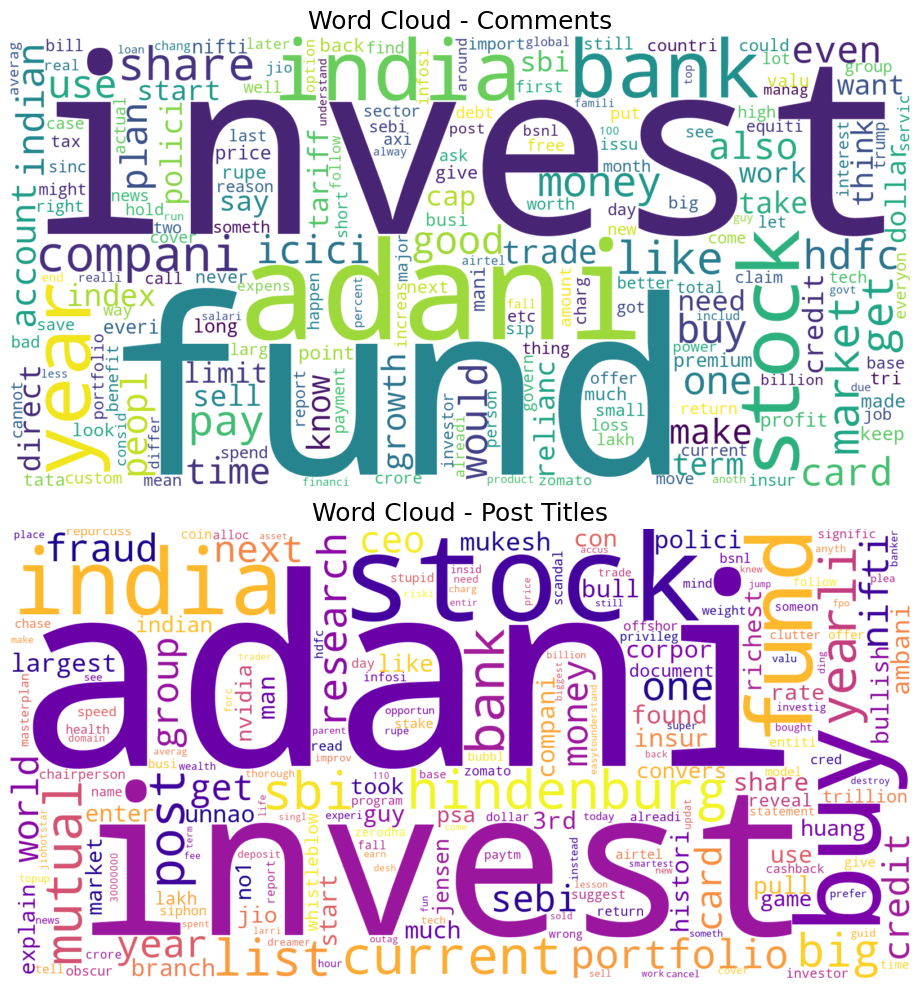

In [41]:

try:
    from wordcloud import WordCloud
except Exception:
    import subprocess, sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'wordcloud'])
    from wordcloud import WordCloud

import matplotlib.pyplot as plt
from collections import Counter
import re

print('Preparing texts for word cloud...')

def safe_text(col):
    return ' '.join(data[col].dropna().astype(str).values)

comments_text = safe_text('Comment_Text')
titles_text = safe_text('Post_Title')


try:
    combined_stopwords
except NameError:
    combined_stopwords = set()


word_pattern = re.compile(r"[\w\u0900-\u097F]+") 

def get_word_freqs(text, max_words=1000):
    words = word_pattern.findall(text.lower())
 
    words = [w for w in words if w not in combined_stopwords and len(w) > 2]
    return Counter(words)

comment_freq = get_word_freqs(comments_text)
title_freq = get_word_freqs(titles_text)

print('Top 20 words in comments:')
for w, f in comment_freq.most_common(20):
    print(f'{w}: {f}')

print('\nTop 20 words in titles:')
for w, f in title_freq.most_common(20):
    print(f'{w}: {f}')

# Generate wordclouds
plt.figure(figsize=(16, 10))

if len(comment_freq) > 0:
    wc_comments = WordCloud(width=1600, height=800, background_color='white', max_words=200, colormap='viridis').generate_from_frequencies(comment_freq)
    plt.subplot(2, 1, 1)
    plt.imshow(wc_comments, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Comments', fontsize=18)
else:
    plt.subplot(2, 1, 1)
    plt.text(0.5, 0.5, 'No comment data available', ha='center', va='center')

if len(title_freq) > 0:
    wc_titles = WordCloud(width=1600, height=800, background_color='white', max_words=200, colormap='plasma').generate_from_frequencies(title_freq)
    plt.subplot(2, 1, 2)
    plt.imshow(wc_titles, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Post Titles', fontsize=18)
else:
    plt.subplot(2, 1, 2)
    plt.text(0.5, 0.5, 'No title data available', ha='center', va='center')

plt.tight_layout()
plt.show()

In [42]:
!pip install sentence-transformers



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from sentence_transformers import SentenceTransformer
import numpy as np


model = SentenceTransformer('all-MiniLM-L6-v2')


c:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Skipping import of cpp extensions due to incompatible torch version 2.9.0+cpu for torchao version 0.13.0
W1110 13:24:07.320000 448 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


c:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vedan\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [44]:
def get_minilm_embedding(text):

    if not isinstance(text, str) or text.strip() == "":
        return np.zeros(384)
    return model.encode(text, convert_to_numpy=True, normalize_embeddings=True)


In [45]:

data['Post_Embeddings'] = data['Post_Title'].apply(get_minilm_embedding)
data['Comment_Embeddings'] = data['Comment_Text'].apply(get_minilm_embedding)


data['Combined_Embeddings'] = data.apply(
    lambda x: (x['Post_Embeddings'] + x['Comment_Embeddings']) / 2,
    axis=1
)


In [51]:

X = np.vstack(data['Combined_Embeddings'].values)


y = data['Sentiment']


In [57]:

import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgbm_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=200,
    
    callbacks=[
        lgb.early_stopping(stopping_rounds=20),
        lgb.log_evaluation(period=20)
    ]
)


y_pred = np.argmax(lgbm_model.predict(X_test), axis=1)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training until validation scores don't improve for 20 rounds
[20]	training's multi_logloss: 0.545938	valid_1's multi_logloss: 0.871636
[40]	training's multi_logloss: 0.324714	valid_1's multi_logloss: 0.848583
[60]	training's multi_logloss: 0.193747	valid_1's multi_logloss: 0.825263
Early stopping, best iteration is:
[55]	training's multi_logloss: 0.222129	valid_1's multi_logloss: 0.824766
Accuracy: 0.6495726495726496
              precision    recall  f1-score   support

           0       0.60      0.12      0.20        25
           1       0.66      0.92      0.77        64
           2       0.61      0.50      0.55        28

    accuracy                           0.65       117
   macro avg       0.62      0.51      0.51       117
weighted avg       0.64      0.65      0.60       117



### Stock Price vs Sentiment Analysis


In [68]:
sentiment_data = pd.read_csv("merged_hinglish_comments.csv")

sentiment_data = sentiment_data[['Post_Date', 'Ticker_Symbol', 'Combined_Sentiment']].copy()

sentiment_data['Post_Date'] = pd.to_datetime(sentiment_data['Post_Date'])

sentiment_data['Date'] = sentiment_data['Post_Date'].dt.date

print(sentiment_data.head())
print(f"\nShape: {sentiment_data.shape}")
print(f"\nSentiment distribution:")
print(sentiment_data['Combined_Sentiment'].value_counts())

   Post_Date Ticker_Symbol Combined_Sentiment        Date
0 2023-12-30      ADANIENT            bullish  2023-12-30
1 2025-02-18      ADANIENT            bullish  2025-02-18
2 2025-03-21      ADANIENT            bullish  2025-03-21
3 2025-09-26      ADANIENT            bullish  2025-09-26
4 2024-11-07      ADANIENT            bearish  2024-11-07

Shape: (583, 4)

Sentiment distribution:
Combined_Sentiment
bullish    317
neutral    140
bearish    126
Name: count, dtype: int64


In [69]:
sentiment_mapping = {
    'bearish': -1, 'Bearish': -1,
    'neutral': 0, 'Neutral': 0,
    'bullish': 1, 'Bullish': 1
}
sentiment_data['Sentiment_Score'] = sentiment_data['Combined_Sentiment'].map(sentiment_mapping)

unmapped = sentiment_data[sentiment_data['Sentiment_Score'].isna()]['Combined_Sentiment'].unique()
if len(unmapped) > 0:
    print(f"Warning: Unmapped sentiment values found: {unmapped}")
    print("These will be treated as neutral (0)")
    sentiment_data['Sentiment_Score'].fillna(0, inplace=True)

daily_sentiment = sentiment_data.groupby(['Date', 'Ticker_Symbol']).agg({
    'Sentiment_Score': 'mean',
    'Combined_Sentiment': 'count'
}).reset_index()

daily_sentiment.columns = ['Date', 'Ticker_Symbol', 'Avg_Sentiment_Score', 'Comment_Count']

print(daily_sentiment.head(10))
print(f"\nShape: {daily_sentiment.shape}")
print(f"\nSentiment score range: {daily_sentiment['Avg_Sentiment_Score'].min():.2f} to {daily_sentiment['Avg_Sentiment_Score'].max():.2f}")
print(f"\nSample sentiment distribution:")
print(f"  Positive (>0.3): {(daily_sentiment['Avg_Sentiment_Score'] > 0.3).sum()} days")
print(f"  Neutral (-0.3 to 0.3): {((daily_sentiment['Avg_Sentiment_Score'] >= -0.3) & (daily_sentiment['Avg_Sentiment_Score'] <= 0.3)).sum()} days")
print(f"  Negative (<-0.3): {(daily_sentiment['Avg_Sentiment_Score'] < -0.3).sum()} days")

         Date Ticker_Symbol  Avg_Sentiment_Score  Comment_Count
0  2020-05-19    BHARTIARTL             1.000000              2
1  2020-11-16      HDFCBANK             1.000000              1
2  2020-11-16     ICICIBANK             1.000000              1
3  2020-11-18      HDFCBANK             0.000000              4
4  2020-11-18     ICICIBANK            -1.000000              1
5  2020-11-18          SBIN             0.333333              3
6  2020-12-03      HDFCBANK             0.400000              5
7  2020-12-03          SBIN             0.000000              2
8  2020-12-20      HDFCBANK             1.000000              1
9  2020-12-20     ICICIBANK             1.000000              2

Shape: (250, 4)

Sentiment score range: -1.00 to 1.00

Sample sentiment distribution:
  Positive (>0.3): 140 days
  Neutral (-0.3 to 0.3): 68 days
  Negative (<-0.3): 42 days


In [70]:
stock_data = pd.read_csv("merged_stock_history.csv")

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Date'] = stock_data['Date'].dt.date

print("Stock price data loaded:")
print(stock_data.head())
print(f"\nShape: {stock_data.shape}")
print(f"\nDate range: {stock_data['Date'].min()} to {stock_data['Date'].max()}")
print(f"\nTickers: {stock_data['Ticker_Symbol'].unique()}")

Stock price data loaded:
         Date         Open         High          Low        Close   Volume  \
0  2024-10-08  3016.957435  3168.380013  2993.319619  3159.084717  1776511   
1  2024-10-09  3173.377323  3178.324745  3132.797975  3152.138184   897335   
2  2024-10-10  3138.395406  3209.359124  3054.538378  3172.577881  2905725   
3  2024-10-11  3172.577771  3188.369745  3114.407563  3135.596680  1035260   
4  2024-10-14  3143.392850  3148.490341  3091.269597  3099.515381   437728   

   Dividends  Stock Splits Ticker_Symbol  
0        0.0           0.0      ADANIENT  
1        0.0           0.0      ADANIENT  
2        0.0           0.0      ADANIENT  
3        0.0           0.0      ADANIENT  
4        0.0           0.0      ADANIENT  

Shape: (2057, 9)

Date range: 2024-10-03 to 2025-10-17

Tickers: ['ADANIENT' 'BHARTIARTL' 'HDFCBANK' 'ICICIBANK' 'INFY' 'RELIANCE' 'SBIN'
 'TCS']


In [71]:
merged_data = pd.merge(
    stock_data,
    daily_sentiment,
    on=['Date', 'Ticker_Symbol'],
    how='left' 
)

merged_data['Avg_Sentiment_Score'].fillna(0, inplace=True)
merged_data['Comment_Count'].fillna(0, inplace=True)

merged_data = merged_data.sort_values(['Ticker_Symbol', 'Date']).reset_index(drop=True)
merged_data['Price_Change_Pct'] = merged_data.groupby('Ticker_Symbol')['Close'].pct_change() * 100

print("Merged data:")
print(merged_data.head(10))
print(f"\nShape: {merged_data.shape}")
print(f"\nDays with comments: {(merged_data['Comment_Count'] > 0).sum()}")
print(f"\nDays without comments: {(merged_data['Comment_Count'] == 0).sum()}")

Merged data:
         Date         Open         High          Low        Close   Volume  \
0  2024-10-08  3016.957435  3168.380013  2993.319619  3159.084717  1776511   
1  2024-10-09  3173.377323  3178.324745  3132.797975  3152.138184   897335   
2  2024-10-10  3138.395406  3209.359124  3054.538378  3172.577881  2905725   
3  2024-10-11  3172.577771  3188.369745  3114.407563  3135.596680  1035260   
4  2024-10-14  3143.392850  3148.490341  3091.269597  3099.515381   437728   
5  2024-10-15  3122.403467  3126.401422  3089.920076  3103.113281   371613   
6  2024-10-16  3096.416667  3113.807677  3059.435577  3084.322754   543476   
7  2024-10-17  3088.370723  3098.415636  2991.470322  3012.209717  2655289   
8  2024-10-18  2988.471953  3030.150593  2966.583243  3000.465820   796339   
9  2024-10-21  3003.614187  3013.409228  2915.459309  2936.148682  1051690   

   Dividends  Stock Splits Ticker_Symbol  Avg_Sentiment_Score  Comment_Count  \
0        0.0           0.0      ADANIENT        

C:\Users\vedan\AppData\Local\Temp\ipykernel_448\4036711210.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Avg_Sentiment_Score'].fillna(0, inplace=True)
C:\Users\vedan\AppData\Local\Temp\ipykernel_448\4036711210.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [73]:
print("Sentiment vs Stock Price Movements")

correlation_results = []

for ticker in merged_data['Ticker_Symbol'].unique():
    ticker_data = merged_data[merged_data['Ticker_Symbol'] == ticker].copy()
    
    ticker_with_comments = ticker_data[ticker_data['Comment_Count'] > 0].copy()
    
    if len(ticker_with_comments) > 1:
        corr = ticker_with_comments['Avg_Sentiment_Score'].corr(ticker_with_comments['Price_Change_Pct'])
        
        correlation_results.append({
            'Ticker': ticker,
            'Correlation': corr,
            'Days_with_Comments': len(ticker_with_comments),
            'Avg_Sentiment': ticker_with_comments['Avg_Sentiment_Score'].mean(),
            'Total_Comments': ticker_with_comments['Comment_Count'].sum()
        })

corr_df = pd.DataFrame(correlation_results).sort_values('Correlation', ascending=False)
print("\n", corr_df.to_string(index=False))

print(f"Correlation for all tickers: {merged_data[merged_data['Comment_Count'] > 0]['Avg_Sentiment_Score'].corr(merged_data[merged_data['Comment_Count'] > 0]['Price_Change_Pct']):.4f}")

Sentiment vs Stock Price Movements

     Ticker  Correlation  Days_with_Comments  Avg_Sentiment  Total_Comments
      INFY     0.762000                   6      -0.166667             6.0
 ICICIBANK     0.347088                   4      -0.500000             4.0
  RELIANCE     0.085664                  30       0.220177            72.0
  ADANIENT     0.004652                  22       0.152778            39.0
       TCS    -0.323889                  12       0.379630            20.0
  HDFCBANK    -0.326673                  12       0.805556            15.0
BHARTIARTL    -0.521594                   5       0.266667             7.0
Correlation for all tickers: 0.0222


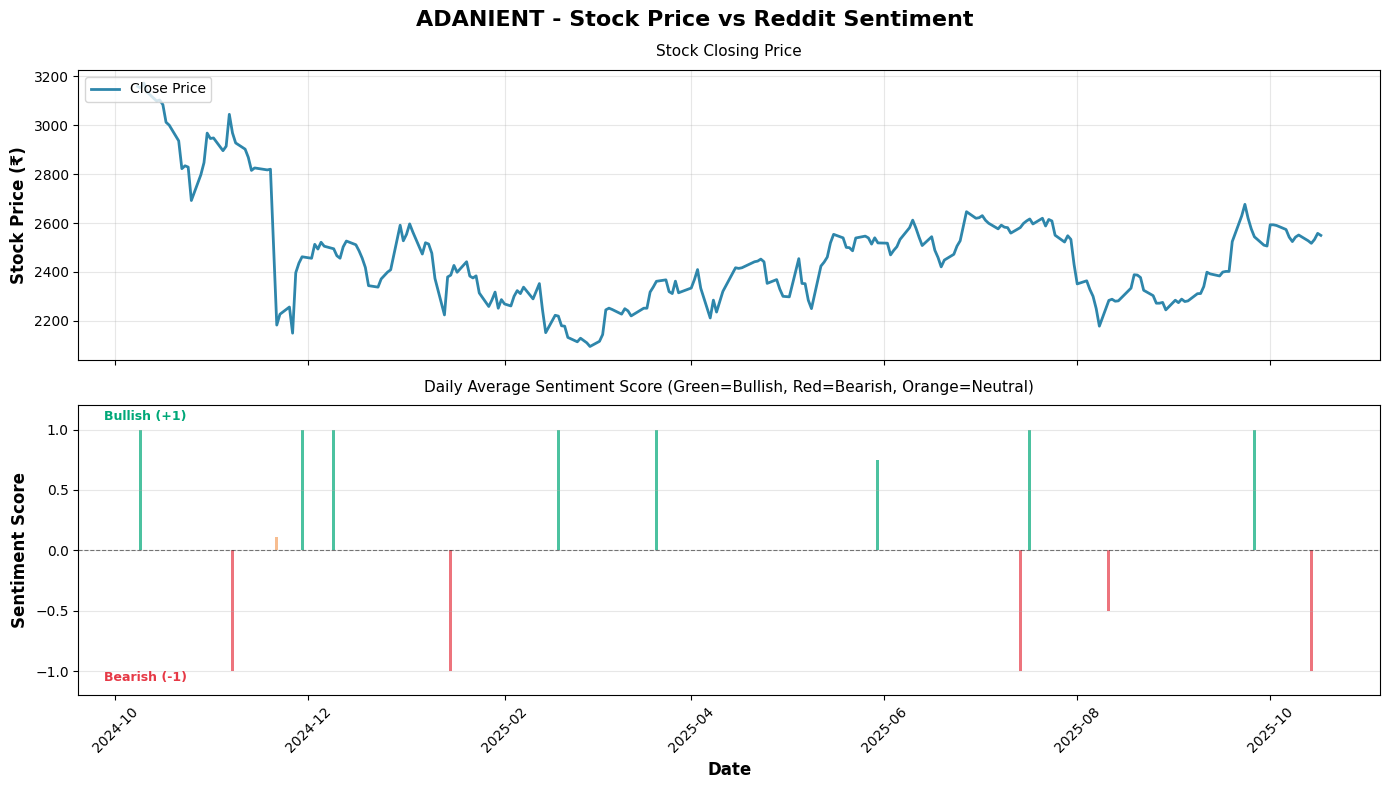


ADANIENT Statistics:
  Total trading days: 259
  Days with Reddit comments: 22
  Total comments: 39
  Average sentiment score: 0.153
  Price change during period: -19.30%


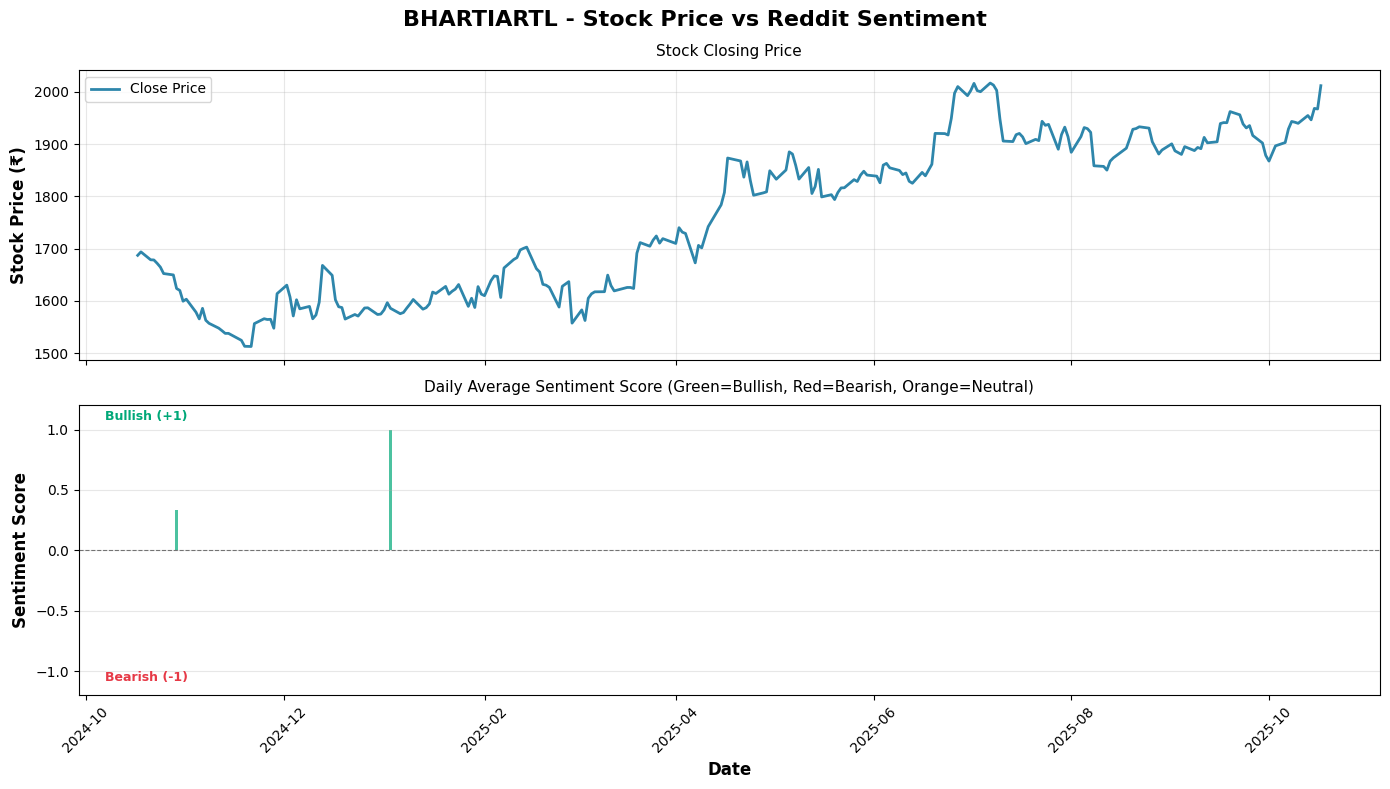


BHARTIARTL Statistics:
  Total trading days: 250
  Days with Reddit comments: 5
  Total comments: 7
  Average sentiment score: 0.267
  Price change during period: 19.26%


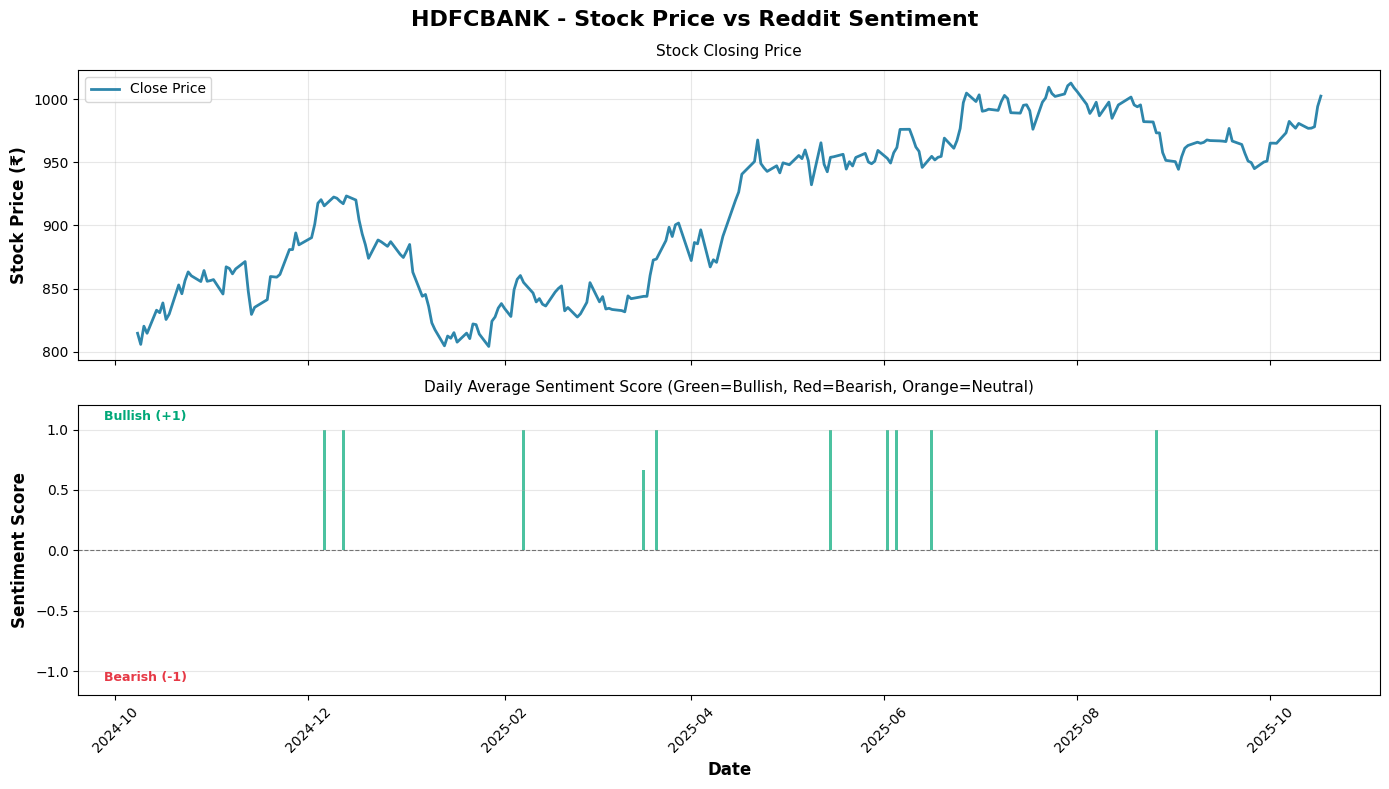


HDFCBANK Statistics:
  Total trading days: 259
  Days with Reddit comments: 12
  Total comments: 15
  Average sentiment score: 0.806
  Price change during period: 23.09%


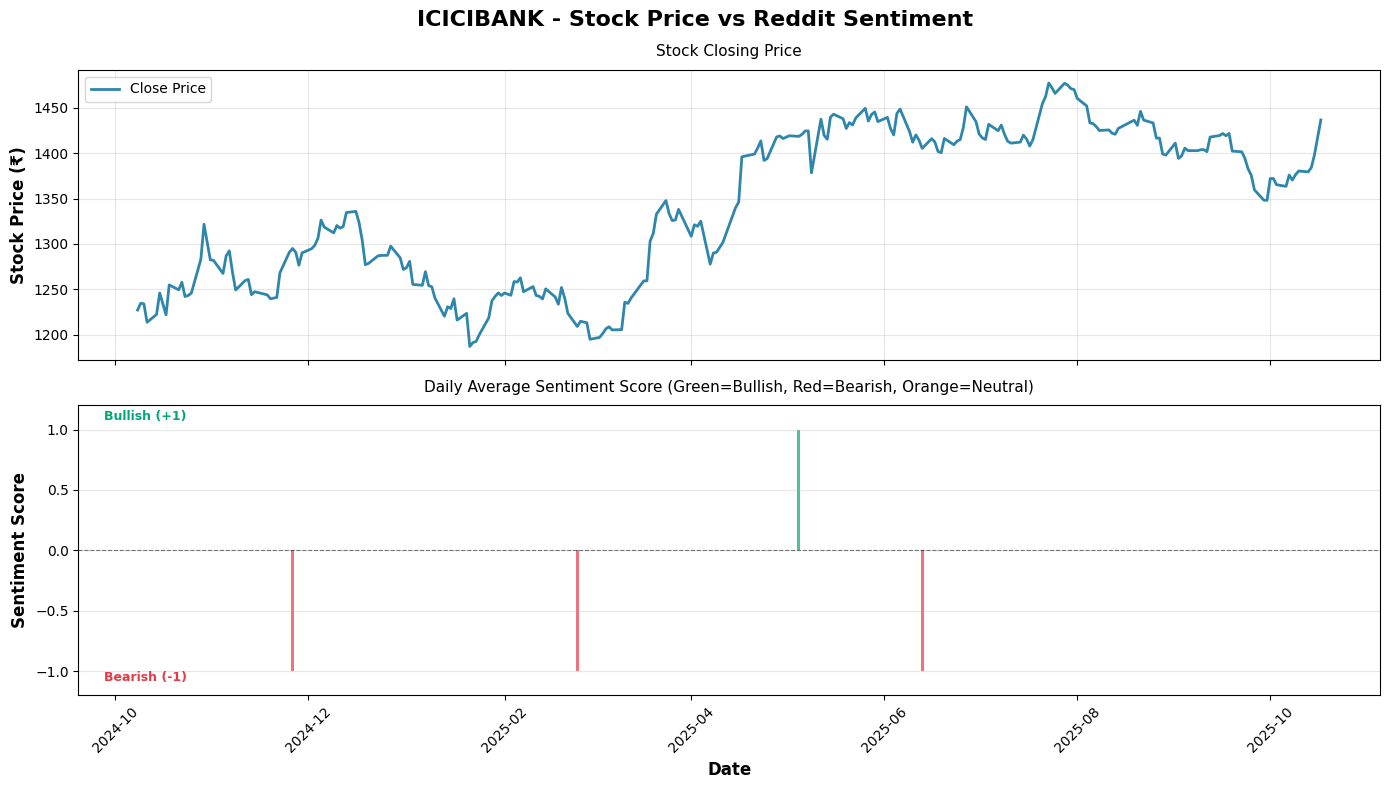


ICICIBANK Statistics:
  Total trading days: 259
  Days with Reddit comments: 4
  Total comments: 4
  Average sentiment score: -0.500
  Price change during period: 17.07%


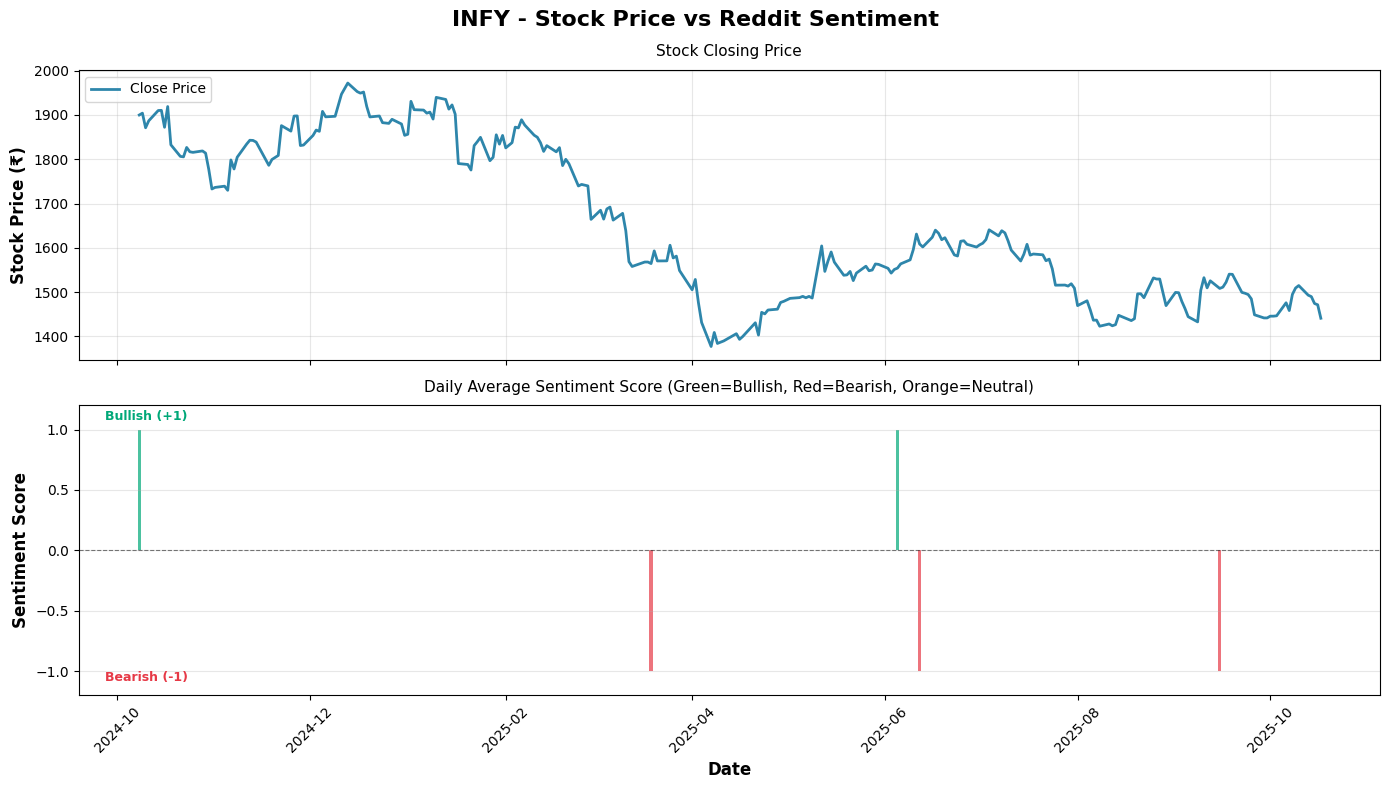


INFY Statistics:
  Total trading days: 259
  Days with Reddit comments: 6
  Total comments: 6
  Average sentiment score: -0.167
  Price change during period: -24.15%


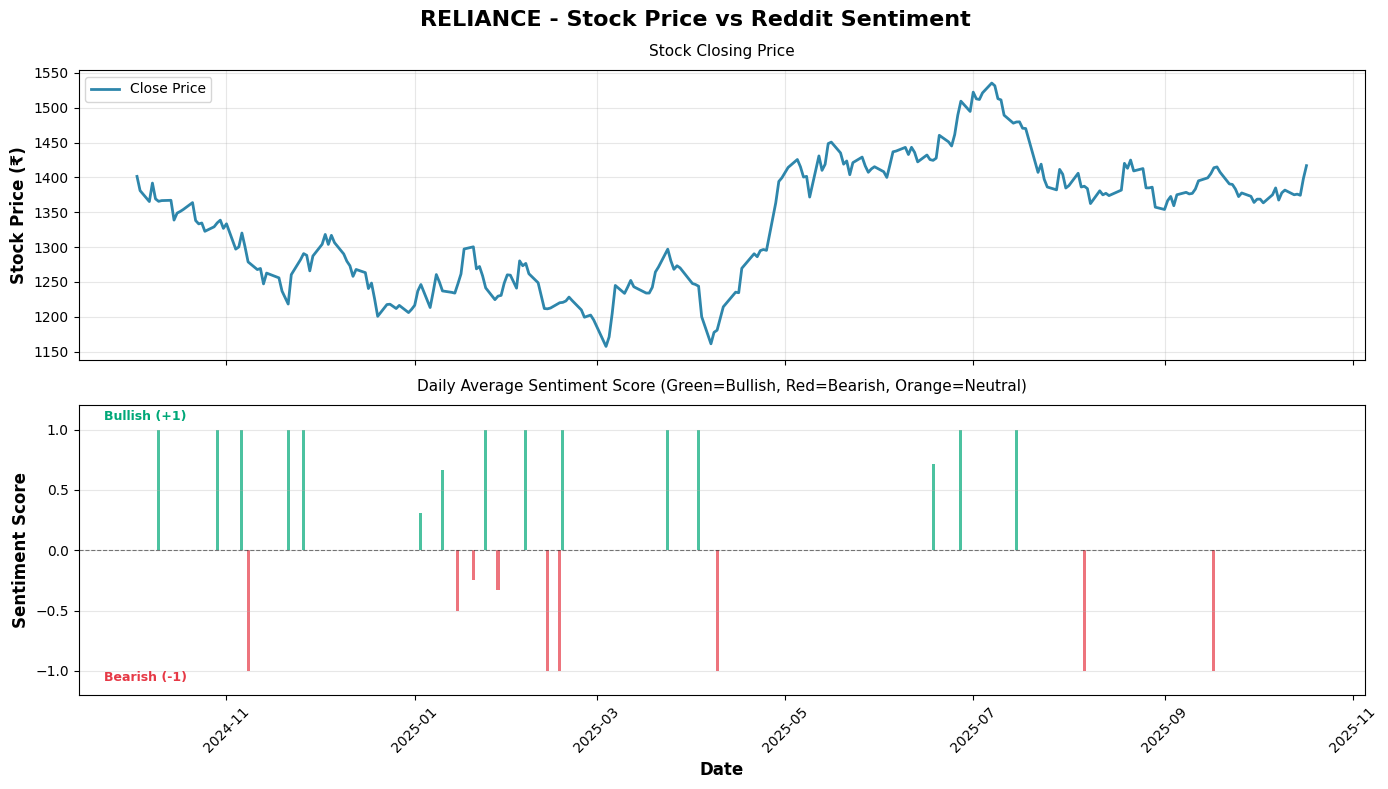


RELIANCE Statistics:
  Total trading days: 262
  Days with Reddit comments: 30
  Total comments: 72
  Average sentiment score: 0.220
  Price change during period: 1.10%


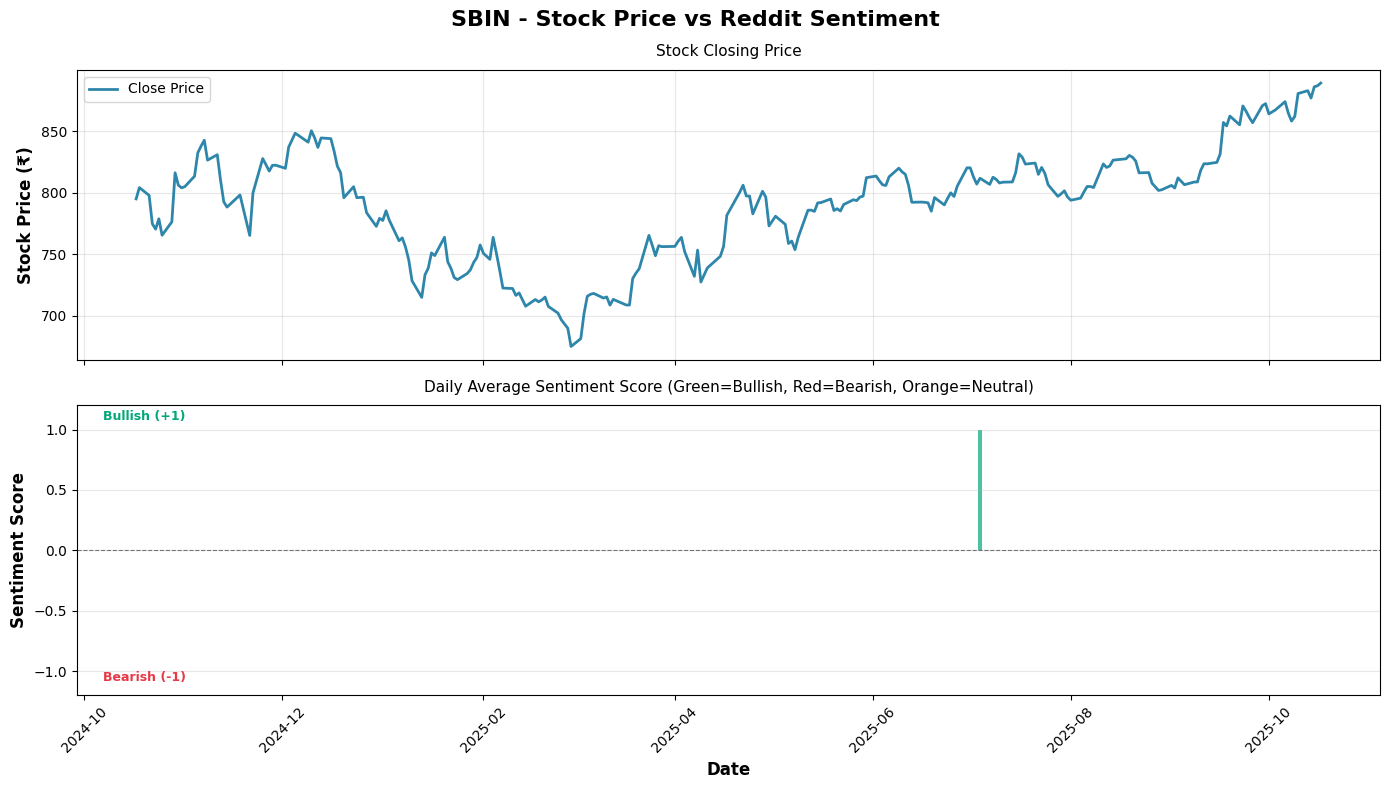


SBIN Statistics:
  Total trading days: 250
  Days with Reddit comments: 1
  Total comments: 1
  Average sentiment score: 1.000
  Price change during period: 11.83%


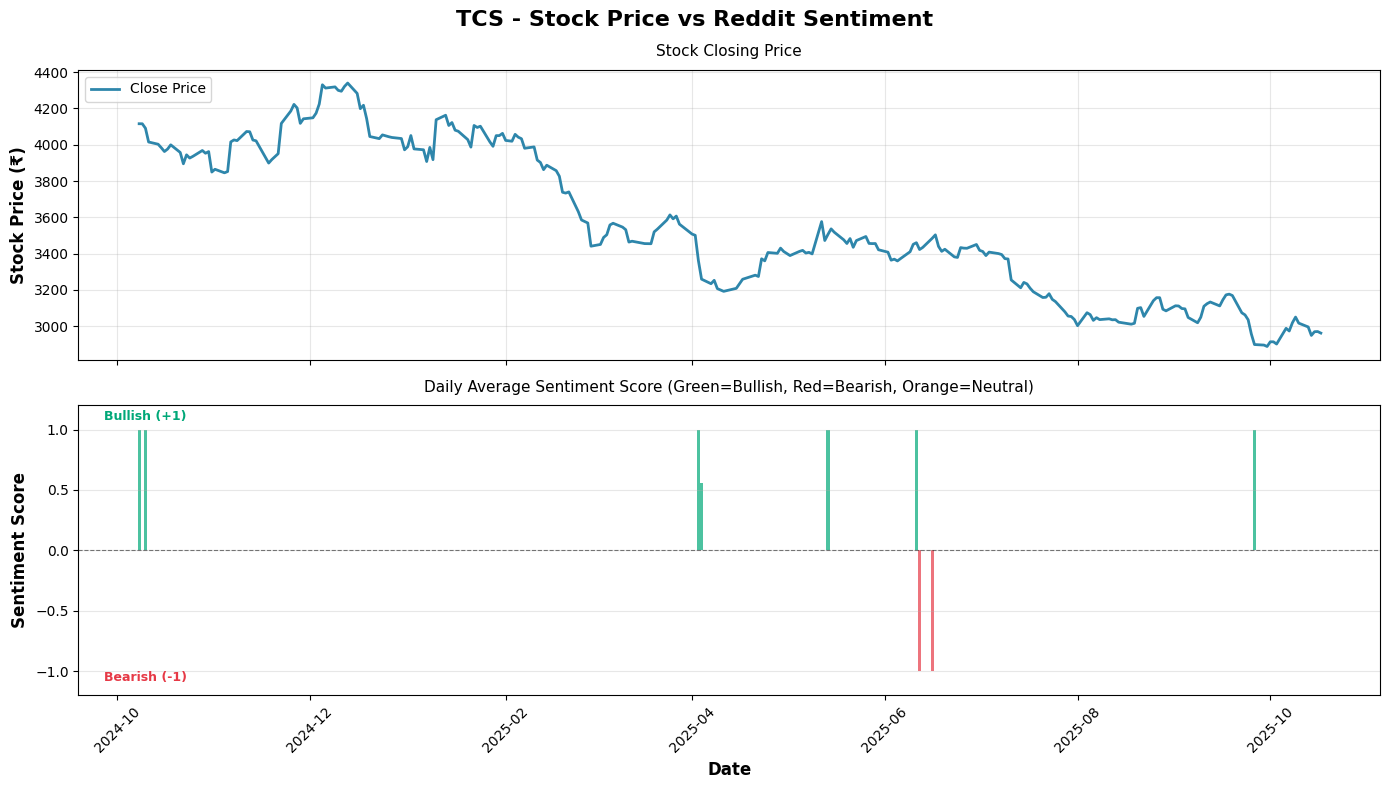


TCS Statistics:
  Total trading days: 259
  Days with Reddit comments: 12
  Total comments: 20
  Average sentiment score: 0.380
  Price change during period: -28.02%


In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

merged_data['Date'] = pd.to_datetime(merged_data['Date'])

tickers = merged_data['Ticker_Symbol'].unique()

for ticker in tickers:
    ticker_data = merged_data[merged_data['Ticker_Symbol'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    fig.suptitle(f'{ticker} - Stock Price vs Reddit Sentiment', fontsize=16, fontweight='bold')
    
    ax1.plot(ticker_data['Date'], ticker_data['Close'], 
             color='#2E86AB', linewidth=2, label='Close Price')
    ax1.set_ylabel('Stock Price (₹)', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax1.set_title('Stock Closing Price', fontsize=11, pad=10)
    
    sentiment_days = ticker_data[ticker_data['Comment_Count'] > 0].copy()
    
    colors = sentiment_days['Avg_Sentiment_Score'].apply(
        lambda x: '#00A878' if x > 0.2 else ('#E63946' if x < -0.2 else '#F4A261')
    )
    
    ax2.bar(sentiment_days['Date'], sentiment_days['Avg_Sentiment_Score'], 
            color=colors, alpha=0.7, width=1, label='Avg Sentiment Score')
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    ax2.set_ylabel('Sentiment Score', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax2.set_ylim(-1.2, 1.2)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_title('Daily Average Sentiment Score (Green=Bullish, Red=Bearish, Orange=Neutral)', 
                  fontsize=11, pad=10)
    
    ax2.text(0.02, 0.95, 'Bullish (+1)', transform=ax2.transAxes, 
             color='#00A878', fontweight='bold', fontsize=9)
    ax2.text(0.02, 0.05, 'Bearish (-1)', transform=ax2.transAxes, 
             color='#E63946', fontweight='bold', fontsize=9)
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    ticker_with_comments = ticker_data[ticker_data['Comment_Count'] > 0]
    if len(ticker_with_comments) > 0:
        print(f"\n{ticker} Statistics:")
        print(f"  Total trading days: {len(ticker_data)}")
        print(f"  Days with Reddit comments: {len(ticker_with_comments)}")
        print(f"  Total comments: {int(ticker_with_comments['Comment_Count'].sum())}")
        print(f"  Average sentiment score: {ticker_with_comments['Avg_Sentiment_Score'].mean():.3f}")
        print(f"  Price change during period: {((ticker_data['Close'].iloc[-1] - ticker_data['Close'].iloc[0]) / ticker_data['Close'].iloc[0] * 100):.2f}%")

In [ ]:
import pickle

lgbm_model.save_model('sentiment_model.txt')

label_mapping = {
    0: 'Bearish',
    1: 'Bullish', 
    2: 'Neutral'
}

with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)

model_info = {
    'sentence_transformer_model': 'all-MiniLM-L6-v2',
    'embedding_dim': 384,
    'label_mapping': label_mapping
}

with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("MODEL SAVED")
print("\nModel Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2%}")

MODEL SAVED

Model Performance:
  Accuracy: 64.96%
